In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from multiprocessing import Pool
from itertools import product
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Import Data

In [2]:
train_org = pd.read_csv('data/train.csv')
test_org = pd.read_csv('data/test.csv')

# Exploratory data analysis


In [3]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train_org.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
train_org.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [6]:
total = train_org.isnull().sum().sort_values(ascending=False)
percent = (train_org.isnull().sum()/train_org.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

In [7]:
print(np.array((missing_data[missing_data['Percent'] > 0.15]).index))

train = train_org.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','Electrical','Utilities'])
test = test_org.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','Electrical','Utilities'])

train.head()



['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage']


Id  MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
0   1          60       RL     8450   Pave      Reg         Lvl    Inside   
1   2          20       RL     9600   Pave      Reg         Lvl       FR2   
2   3          60       RL    11250   Pave      IR1         Lvl    Inside   
3   4          70       RL     9550   Pave      IR1         Lvl    Corner   
4   5          60       RL    14260   Pave      IR1         Lvl       FR2   

  LandSlope Neighborhood    ...    EnclosedPorch 3SsnPorch ScreenPorch  \
0       Gtl      CollgCr    ...                0         0           0   
1       Gtl      Veenker    ...                0         0           0   
2       Gtl      CollgCr    ...                0         0           0   
3       Gtl      Crawfor    ...              272         0           0   
4       Gtl      NoRidge    ...                0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 73 columns]

Combine month and year 

In [8]:
minyear = train_org.YrSold.min()
train['date_block_num'] = train.MoSold + 12 * (train.YrSold - minyear) - 1
test['date_block_num'] = test.MoSold + 12 * (test.YrSold - minyear) - 1

train = train.drop(columns=['MoSold', 'YrSold'])
test = test.drop(columns=['MoSold', 'YrSold'])

train.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
0   1          60       RL     8450   Pave      Reg         Lvl    Inside   
1   2          20       RL     9600   Pave      Reg         Lvl       FR2   
2   3          60       RL    11250   Pave      IR1         Lvl    Inside   
3   4          70       RL     9550   Pave      IR1         Lvl    Corner   
4   5          60       RL    14260   Pave      IR1         Lvl       FR2   

  LandSlope Neighborhood      ...       OpenPorchSF EnclosedPorch 3SsnPorch  \
0       Gtl      CollgCr      ...                61             0         0   
1       Gtl      Veenker      ...                 0             0         0   
2       Gtl      CollgCr      ...                42             0         0   
3       Gtl      Crawfor      ...                35           272         0   
4       Gtl      NoRidge      ...                84             0         0   

  ScreenPorch  PoolArea  MiscVal  SaleType  SaleCondition SalePrice  \
0           0         0        0        WD         Normal    208500   
1           0         0        0        WD         Normal    181500   
2           0         0        0        WD         Normal    223500   
3           0         0        0        WD        Abnorml    140000   
4           0         0        0        WD         Normal    250000   

  date_block_num  
0             25  
1             16  
2             32  
3              1  
4             35  

[5 rows x 72 columns]

In [9]:
test.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour LotConfig  \
0  1461          20       RH    11622   Pave      Reg         Lvl    Inside   
1  1462          20       RL    14267   Pave      IR1         Lvl    Corner   
2  1463          60       RL    13830   Pave      IR1         Lvl    Inside   
3  1464          60       RL     9978   Pave      IR1         Lvl    Inside   
4  1465         120       RL     5005   Pave      IR1         HLS    Inside   

  LandSlope Neighborhood      ...       WoodDeckSF OpenPorchSF EnclosedPorch  \
0       Gtl        NAmes      ...              140           0             0   
1       Gtl        NAmes      ...              393          36             0   
2       Gtl      Gilbert      ...              212          34             0   
3       Gtl      Gilbert      ...              360          36             0   
4       Gtl      StoneBr      ...                0          82             0   

  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SaleType SaleCondition  \
0         0          120         0        0        WD        Normal   
1         0            0         0    12500        WD        Normal   
2         0            0         0        0        WD        Normal   
3         0            0         0        0        WD        Normal   
4         0          144         0        0        WD        Normal   

  date_block_num  
0             53  
1             53  
2             50  
3             53  
4             48  

[5 rows x 71 columns]

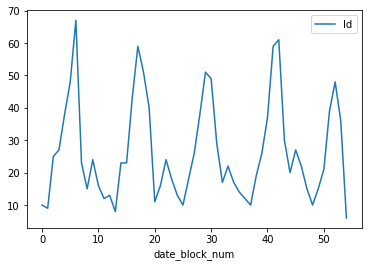

In [10]:
train[['Id','date_block_num']].groupby(['date_block_num']).count().plot()

# Identify outliers

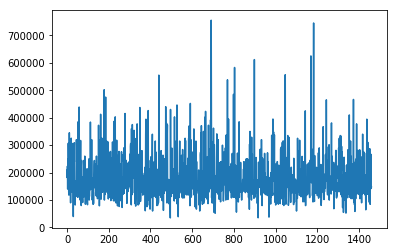

In [11]:
train.SalePrice.plot()

In [12]:
import pandas_profiling as pdp
train_profile = pdp.ProfileReport(train)
train_profile

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\traitlets

In [13]:
test_profile = pdp.ProfileReport(test)
test_profile

In [14]:
object_types = train.select_dtypes(include='object')
object_types.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 non-null object
BsmtFinType2     14

# Mean encoding with leave one out

In real world if we want to predict future prices we could stack mean values for previous periods.
To keep this example simple, lets try different approach. We are trying to estimate prices by taking into account prices for all other houses except the one which we are estimating.
We will do this by calculating mean target values for all examples except the one for which we are encoding, its called leave one out approach.
We achieve this by calculating sum, substructing current price and dividing by number of examples minus 1. 


In [15]:
noOfExamples = train.shape[0]
print(noOfExamples)

for column_name in ['1stFlrSF','2ndFlrSF','BsmtUnfSF','BldgType','BsmtFinSF1','Fireplaces','FullBath','GarageCars','Neighborhood',
                   'YearBuilt','OverallQual','GarageArea','TotalBsmtSF',]:
    for column_postfix, agg_func, func_name in [('SalePrice',np.sum,'avg')]:
        mean_df = train.groupby([column_name,'date_block_num']).agg(agg_func).reset_index()[[column_postfix,column_name,'date_block_num']]
        mean_df.columns = [column_name+'_'+func_name+'_'+column_postfix, column_name,'date_block_num']
        train = pd.merge(train,mean_df,on=['date_block_num', column_name],how='left')
        enc_column_name = column_name+'_'+func_name+'_'+column_postfix
        train[enc_column_name] = (train[enc_column_name] - train['SalePrice'])/noOfExamples-1

        

1460


In [16]:
x_data = train.select_dtypes(exclude=[object])

x_data.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2            ...              \
0       196.0         706           0            ...               
1         0.0         978           0            ...               
2       162.0         486           0            ...               
3         0.0         216           0            ...               
4       350.0         655           0            ...               

   BldgType_avg_SalePrice  BsmtFinSF1_avg_SalePrice  Fireplaces_avg_SalePrice  \
0              847.767123                      -1.0                519.684932   
1             4719.247260                      -1.0               2661.370548   
2             1480.335616                      -1.0               1057.904110   
3             1100.986301                      -1.0                680.780822   
4             1343.452055                      -1.0                268.178082   

   FullBath_avg_SalePrice  GarageCars_avg_SalePrice  \
0              497.767123                674.479452   
1             2372.226712               2466.431507   
2             1288.931507               1281.089041   
3              104.821918                313.383562   
4              892.150685                312.698630   

   Neighborhood_avg_SalePrice  YearBuilt_avg_SalePrice  \
0                   98.315068                -1.000000   
1                   -1.000000               200.917808   
2                  631.808219               195.575342   
3                   -1.000000                -1.000000   
4                   -1.000000                -1.000000   

   OverallQual_avg_SalePrice  GarageArea_avg_SalePrice  \
0                 482.356164                      -1.0   
1                1325.678082                      -1.0   
2                 418.109589                      -1.0   
3                 602.767123                      -1.0   
4                 408.246575                      -1.0   

   TotalBsmtSF_avg_SalePrice  
0                       -1.0  
1                       -1.0  
2                       -1.0  
3                       -1.0  
4                       -1.0  

[5 rows x 49 columns]

In [17]:
from sklearn.model_selection import train_test_split
x_data = x_data.drop(columns=['SalePrice'])
y_data = train['SalePrice']

x_data.fillna((-999), inplace=True) 
x_data.head(5)

X_train, X_val, Y_train, Y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=0)


In [18]:
X_train.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
618  619          20    11694            9            5       2007   
870  871          20     6600            5            5       1962   
92    93          30    13360            5            7       1921   
817  818          20    13265            8            5       2002   
302  303          20    13704            7            5       2001   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
618          2007       452.0          48           0   
870          1962         0.0           0           0   
92           2006         0.0         713           0   
817          2002       148.0        1218           0   
302          2002       150.0           0           0   

               ...              BldgType_avg_SalePrice  \
618            ...                         6189.565753   
870            ...                         2598.745890   
92             ...                         2561.759589   
817            ...                         4919.664384   
302            ...                         1136.602740   

     BsmtFinSF1_avg_SalePrice  Fireplaces_avg_SalePrice  \
618                 -1.000000               2871.260959   
870               1028.481507               1470.506849   
92                  -1.000000               1433.520548   
817                 -1.000000                496.808219   
302                345.164384                793.109589   

     FullBath_avg_SalePrice  GarageCars_avg_SalePrice  \
618             4085.576027               1915.456164   
870             1072.072603                574.000000   
92              1035.086301               2245.805479   
817             3557.158904                329.136986   
302              557.493151                360.643836   

     Neighborhood_avg_SalePrice  YearBuilt_avg_SalePrice  \
618                  570.917808               121.972603   
870                  345.917808                -1.000000   
92                   107.561644                -1.000000   
817                  225.712329                -1.000000   
302                  177.082192                -1.000000   

     OverallQual_avg_SalePrice  GarageArea_avg_SalePrice  \
618                 452.716438                      -1.0   
870                 750.369863                      -1.0   
92                  713.383562                      -1.0   
817                 363.246575                      -1.0   
302                 177.082192                      -1.0   

     TotalBsmtSF_avg_SalePrice  
618                       -1.0  
870                       -1.0  
92                        -1.0  
817                       -1.0  
302                       -1.0  

[5 rows x 48 columns]

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score 

param = {'max_depth':10, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':100, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}

progress = dict()

xgbtrain = xgb.DMatrix(X_train.values,Y_train)
watchlist  = [(xgbtrain,'train-rmse')]

bstModel = xgb.train(param, xgbtrain)
pred_xgb = bstModel.predict(xgb.DMatrix(X_val.values))

rmse = np.sqrt(mean_squared_error(pred_xgb,Y_val))
print('RMSE for xgboost is %f' % rmse)
print('R2 score: %.2f' % r2_score(pred_xgb, Y_val))

RMSE for xgboost is 31155.836764
R2 score: 0.81


In [20]:
from sklearn.linear_model import LinearRegression

lrModel = LinearRegression()        
lrModel.fit(X_train.values, Y_train)
pred_lr = lrModel.predict(X_val.values)

rmse = np.sqrt(mean_squared_error(pred_lr,Y_val))

print('RMSE for linreg is %f' % rmse)
print('R2 score: %.2f' % r2_score(pred_lr, Y_val))
    

RMSE for linreg is 47282.814689
R2 score: 0.66


In [21]:
import lightgbm as lgb

lgb_params = {
               'feature_fraction': 0.75,
               'metric': 'rmse',
               'nthread':1, 
               'min_data_in_leaf': 2**7, 
               'bagging_fraction': 0.75, 
               'learning_rate': 0.03, 
               'objective': 'mse', 
               'bagging_seed': 2**7, 
               'num_leaves': 2**7,
               'bagging_freq':1,
               'verbose':0 
              }

lgbModel = lgb.train(lgb_params, lgb.Dataset(X_train.values, label=Y_train), 100)
pred_lgb = lgbModel.predict(X_val)

rmse = np.sqrt(mean_squared_error(pred_lgb, Y_val))

print('RMSE for LightGBM is %f' % rmse)
print('R2 score: %.2f' % r2_score(pred_lgb, Y_val))

RMSE for LightGBM is 44217.659970
R2 score: 0.46
